In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data  =   pd.read_csv("housing.csv")

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [3]:
data.dropna(inplace=True)

In [4]:
from sklearn.model_selection import train_test_split
x = data.drop(columns = "median_house_value")
y = data["median_house_value"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [5]:
train_data = x_train.join(y_train)

In [6]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
18811,-121.63,40.92,23.0,1922.0,411.0,872.0,350.0,2.2337,INLAND,64500.0
15100,-116.95,32.82,18.0,3038.0,592.0,1904.0,595.0,3.8024,<1H OCEAN,144900.0
4624,-118.32,34.06,52.0,983.0,246.0,578.0,204.0,5.7393,<1H OCEAN,500001.0
20114,-120.47,37.96,25.0,2505.0,529.0,1145.0,483.0,2.0060,INLAND,103000.0
1969,-120.63,38.73,11.0,4577.0,836.0,1944.0,700.0,4.0675,INLAND,140200.0
...,...,...,...,...,...,...,...,...,...,...
5253,-118.49,34.11,27.0,6603.0,879.0,2336.0,868.0,13.2935,<1H OCEAN,500001.0
14912,-117.05,32.61,26.0,1563.0,286.0,1145.0,313.0,3.8615,NEAR OCEAN,139300.0
4715,-118.37,34.06,52.0,1608.0,289.0,630.0,252.0,5.5596,<1H OCEAN,500001.0
18335,-122.16,37.44,34.0,2199.0,529.0,1193.0,532.0,4.2972,NEAR BAY,405900.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

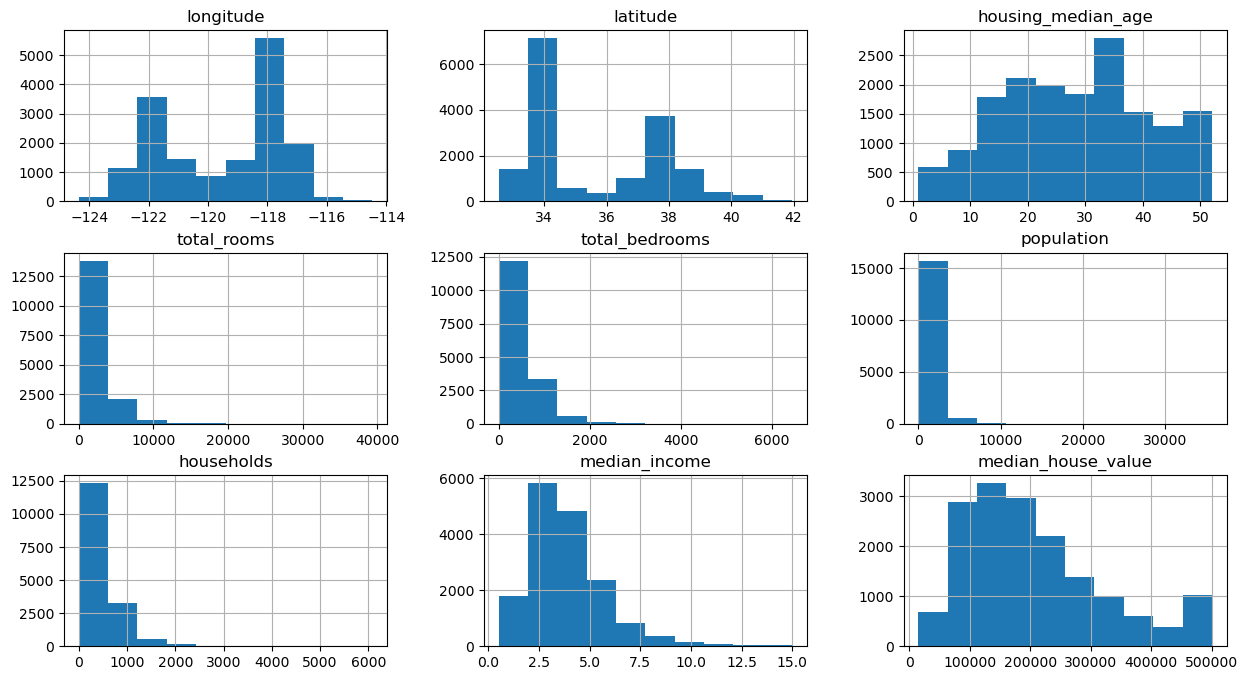

In [7]:
train_data.hist(figsize=(15,8))

In [8]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_rooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

In [9]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7231
INLAND        5195
NEAR OCEAN    2121
NEAR BAY      1798
ISLAND           1
Name: count, dtype: int64

In [10]:
train_data=train_data.join(pd.get_dummies(train_data.ocean_proximity).astype(int)).drop(columns = "ocean_proximity")

<Axes: >

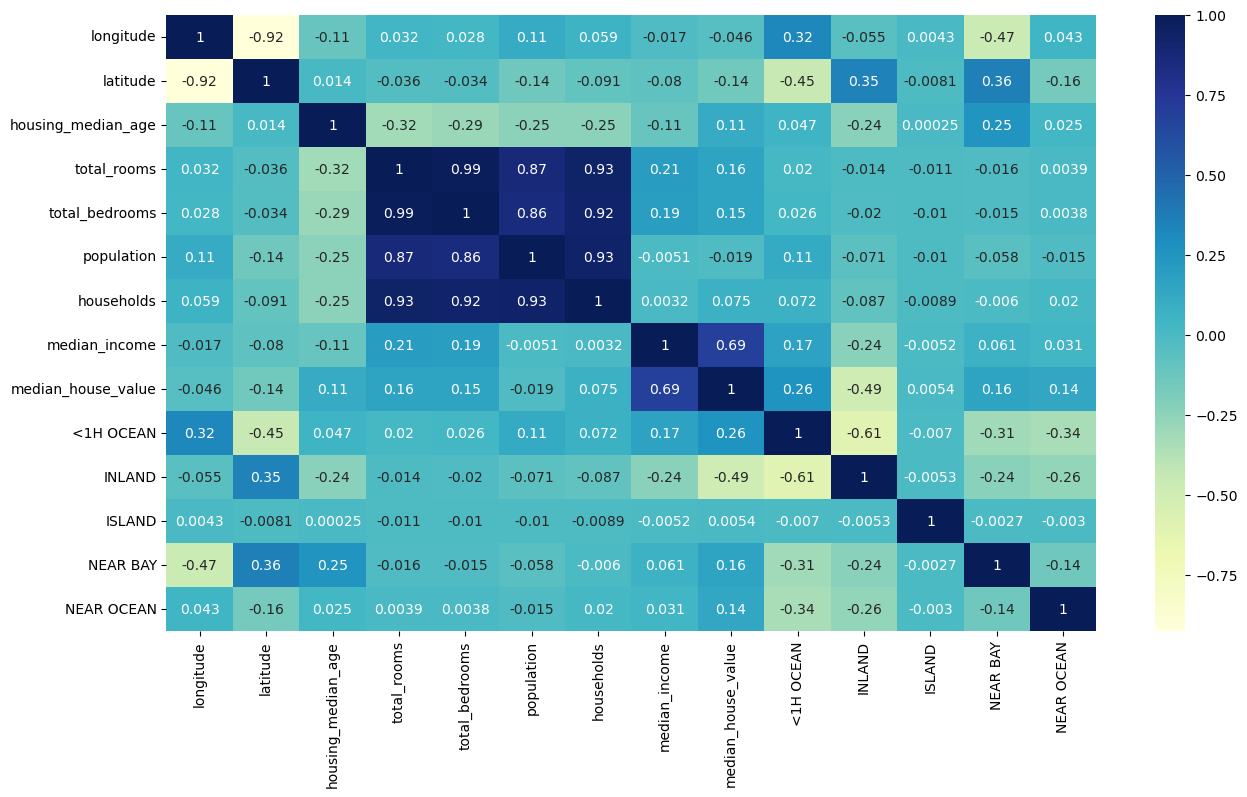

In [11]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot = True, cmap="YlGnBu")

In [12]:
from sklearn.linear_model import LinearRegression
x_train,y_train = train_data.drop(columns = "median_house_value"),train_data['median_house_value']
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [13]:
test_data = x_test.join(y_test)


test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_rooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data=test_data.join(pd.get_dummies(test_data.ocean_proximity).astype(int)).drop(columns = "ocean_proximity")

In [14]:
x_test,y_test = test_data.drop(columns = "median_house_value"),test_data['median_house_value']

In [15]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
18811,-121.63,40.92,23.0,7.561642,2.147292,6.771936,5.860786,2.2337,64500.0,0,1,0,0,0
15100,-116.95,32.82,18.0,8.019284,2.199365,7.552237,6.390241,3.8024,144900.0,1,0,0,0,0
4624,-118.32,34.06,52.0,6.891626,2.065802,6.361302,5.323010,5.7393,500001.0,1,0,0,0,0
20114,-120.47,37.96,25.0,7.826443,2.177752,7.044033,6.182085,2.0060,103000.0,0,1,0,0,0
1969,-120.63,38.73,11.0,8.429018,2.243792,7.573017,6.552508,4.0675,140200.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5253,-118.49,34.11,27.0,8.795431,2.281916,7.756623,6.767343,13.2935,500001.0,1,0,0,0,0
14912,-117.05,32.61,26.0,7.355002,2.122860,7.044033,5.749393,3.8615,139300.0,0,0,0,0,1
4715,-118.37,34.06,52.0,7.383368,2.126250,6.447306,5.533389,5.5596,500001.0,1,0,0,0,0
18335,-122.16,37.44,34.0,7.696213,2.162888,7.085064,6.278521,4.2972,405900.0,0,0,0,1,0


In [16]:
model.score(x_test,y_test)

0.6556816158362475

In [17]:
model.predict([[-121 , 35 , 15, 10,2,7,6,2,1,1,1,1,1]])

C:\Users\giris\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([326805.65193549])

In [63]:
from sklearn.ensemble import RandomForestRegressor
import joblib
forest = RandomForestRegressor()
forest.fit(x_train,y_train)


['house-predictor.joblib']

In [57]:
forest.score(x_test,y_test)

0.8078573729204628

In [46]:
forest.predict([[-121 , 35 , 15, 10,2,7,6,2,1,1,1,1,1]])

C:\Users\giris\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([85727.98])

In [64]:
joblib.dump(forest,"house-predictor.joblib")

['house-predictor.joblib']